In this chapter, you’ll leverage powerful filtering techniques, including semi-joins and anti-joins. You’ll also learn how to glue DataFrames by vertically combining and using the pandas.concat function to create new datasets. Finally, because data is rarely clean, you’ll also learn how to validate your newly combined data structures.

## Filtering Joins

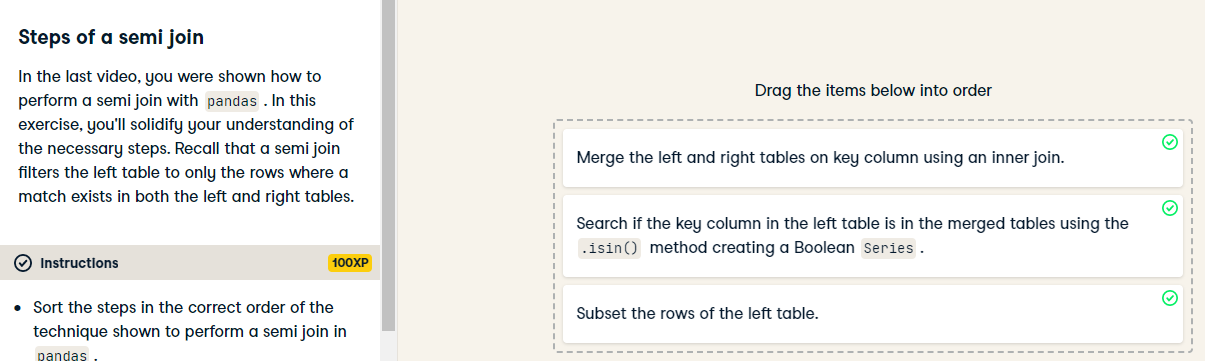

#### Performing an anti join
In our music streaming company dataset, each customer is assigned an employee representative to assist them. In this exercise, filter the employee table by a table of top customers, returning only those employees who are not assigned to a customer. The results should resemble the results of an anti join. The company's leadership will assign these employees additional training so that they can work with high valued customers.

In [1]:
'''
# Merge employees and top_cust
empl_cust = employees.merge(top_cust, on='srid', 
                                 how='left', indicator=True)

# Select the srid column where _merge is left_only
srid_list = empl_cust.loc[empl_cust['_merge'] == 'left_only', 'srid']

# Get employees not working with top customers
print(employees[employees["srid"].isin(srid_list)])

'''

'\n# Merge employees and top_cust\nempl_cust = employees.merge(top_cust, on=\'srid\', \n                                 how=\'left\', indicator=True)\n\n# Select the srid column where _merge is left_only\nsrid_list = empl_cust.loc[empl_cust[\'_merge\'] == \'left_only\', \'srid\']\n\n# Get employees not working with top customers\nprint(employees[employees["srid"].isin(srid_list)])\n\n'

#### Performing a semi join
Some of the tracks that have generated the most significant amount of revenue are from TV-shows or are other non-musical audio. You have been given a table of invoices that include top revenue-generating items. Additionally, you have a table of non-musical tracks from the streaming service. In this exercise, you'll use a semi join to find the top revenue-generating non-musical tracks..

The tables non_mus_tcks, top_invoices, and genres have been loaded for you.

In [2]:
'''
# Merge the non_mus_tck and top_invoices tables on tid
tracks_invoices = non_mus_tcks.merge(top_invoices, on = "tid", how = "inner")

# Use .isin() to subset non_mus_tcks to rows with tid in tracks_invoices
top_tracks = non_mus_tcks[non_mus_tcks['tid'].isin(tracks_invoices["tid"])]

# Group the top_tracks by gid and count the tid rows
cnt_by_gid = top_tracks.groupby(['gid'], as_index=False).agg({'tid':'count'})

# Merge the genres table to cnt_by_gid on gid and print
print(cnt_by_gid.merge(genres, on = "gid"))

'''

'\n# Merge the non_mus_tck and top_invoices tables on tid\ntracks_invoices = non_mus_tcks.merge(top_invoices, on = "tid", how = "inner")\n\n# Use .isin() to subset non_mus_tcks to rows with tid in tracks_invoices\ntop_tracks = non_mus_tcks[non_mus_tcks[\'tid\'].isin(tracks_invoices["tid"])]\n\n# Group the top_tracks by gid and count the tid rows\ncnt_by_gid = top_tracks.groupby([\'gid\'], as_index=False).agg({\'tid\':\'count\'})\n\n# Merge the genres table to cnt_by_gid on gid and print\nprint(cnt_by_gid.merge(genres, on = "gid"))\n\n'

## Concatenate DataFrames together vertically

#### Concatenation basics
You have been given a few tables of data with musical track info for different albums from the metal band, Metallica. The track info comes from their Ride The Lightning, Master Of Puppets, and St. Anger albums. Try various features of the .concat() method by concatenating the tables vertically together in different ways.

The tables tracks_master, tracks_ride, and tracks_st have loaded for you.

In [4]:
'''
# Concatenate the tracks
tracks_from_albums = pd.concat([tracks_master,tracks_ride,tracks_st],
                               sort=True)
print(tracks_from_albums)

'''

'\n# Concatenate the tracks\ntracks_from_albums = pd.concat([tracks_master,tracks_ride,tracks_st],\n                               sort=True)\nprint(tracks_from_albums)\n\n'

In [7]:
'''
# Concatenate the tracks so the index goes from 0 to n-1
tracks_from_albums = pd.concat([tracks_master,tracks_ride, tracks_st],
                               ignore_index = True,
                               sort=True)
print(tracks_from_albums)
'''

'\n# Concatenate the tracks so the index goes from 0 to n-1\ntracks_from_albums = pd.concat([tracks_master,tracks_ride, tracks_st],\n                               ignore_index = True,\n                               sort=True)\nprint(tracks_from_albums)\n'

In [6]:
'''
# Concatenate the tracks, show only columns names that are in all tables
tracks_from_albums = pd.concat([tracks_master, tracks_ride, tracks_st],
                               join = "inner" ,
                               sort=True)
print(tracks_from_albums)
'''

'\n# Concatenate the tracks, show only columns names that are in all tables\ntracks_from_albums = pd.concat([tracks_master, tracks_ride, tracks_st],\n                               join = "inner" ,\n                               sort=True)\nprint(tracks_from_albums)\n'

#### Concatenating with keys
The leadership of the music streaming company has come to you and asked you for assistance in analyzing sales for a recent business quarter. They would like to know which month in the quarter saw the highest average invoice total. You have been given three tables with invoice data named inv_jul, inv_aug, and inv_sep. Concatenate these tables into one to create a graph of the average monthly invoice total.

In [9]:
'''
# Concatenate the tables and add keys
inv_jul_thr_sep = pd.concat([inv_jul, inv_aug, inv_sep],
                            keys=['7Jul', '8Aug', '9Sep'])

# Group the invoices by the index keys and find avg of the total column
avg_inv_by_month = inv_jul_thr_sep.groupby(level=0).agg({"total":"mean"})

# Bar plot of avg_inv_by_month
avg_inv_by_month.plot(kind = "bar")
plt.show()
'''

'\n# Concatenate the tables and add keys\ninv_jul_thr_sep = pd.concat([inv_jul, inv_aug, inv_sep],\n                            keys=[\'7Jul\', \'8Aug\', \'9Sep\'])\n\n# Group the invoices by the index keys and find avg of the total column\navg_inv_by_month = inv_jul_thr_sep.groupby(level=0).agg({"total":"mean"})\n\n# Bar plot of avg_inv_by_month\navg_inv_by_month.plot(kind = "bar")\nplt.show()\n'

#### Using the append method
The .concat() method is excellent when you need a lot of control over how concatenation is performed. However, if you do not need as much control, then the .append() method is another option. You'll try this method out by appending the track lists together from different Metallica albums. From there, you will merge it with the invoice_items table to determine which track sold the most.

The tables tracks_master, tracks_ride, tracks_st, and invoice_items have loaded for you.

In [10]:
'''
# Use the .append() method to combine the tracks tables
metallica_tracks = tracks_ride.append([tracks_master, tracks_st], sort=False)

# Merge metallica_tracks and invoice_items
tracks_invoices = metallica_tracks.merge(invoice_items, on = "tid", how = "inner")

# For each tid and name sum the quantity sold
tracks_sold = tracks_invoices.groupby(['tid','name']).agg({"quantity":"sum"})

# Sort in decending order by quantity and print the results
print(tracks_sold.sort_values("quantity", ascending = False))
'''

'\n# Use the .append() method to combine the tracks tables\nmetallica_tracks = tracks_ride.append([tracks_master, tracks_st], sort=False)\n\n# Merge metallica_tracks and invoice_items\ntracks_invoices = metallica_tracks.merge(invoice_items, on = "tid", how = "inner")\n\n# For each tid and name sum the quantity sold\ntracks_sold = tracks_invoices.groupby([\'tid\',\'name\']).agg({"quantity":"sum"})\n\n# Sort in decending order by quantity and print the results\nprint(tracks_sold.sort_values("quantity", ascending = False))\n'

## Verifying integrity

#### Validating a merge
You have been given 2 tables, artists, and albums. Use the IPython shell to merge them using artists.merge(albums, on='artid').head(). Adjust the validate argument to answer which statement is False.

Instructions
50 XP
Possible Answers

a)You can use 'many_to_many' without an error, since there is a duplicate key in one of the tables.

b)You can use 'one_to_many' without error, since there is a duplicate key in the right table.

<strong>c)You can use 'many_to_one' without an error, since there is a duplicate key in the left table.</strong>

#### Concatenate and merge to find common songs
The senior leadership of the streaming service is requesting your help again. You are given the historical files for a popular playlist in the classical music genre in 2018 and 2019. Additionally, you are given a similar set of files for the most popular pop music genre playlist on the streaming service in 2018 and 2019. Your goal is to concatenate the respective files to make a large classical playlist table and overall popular music table. Then filter the classical music table using a semi join to return only the most popular classical music tracks.

The tables classic_18, classic_19, and pop_18, pop_19 have been loaded for you. Additionally, pandas has been loaded as pd.

In [2]:
import pandas as pd

'''
# Concatenate the classic tables vertically
classic_18_19 = pd.concat([classic_18, classic_19], ignore_index=True)

# Concatenate the pop tables vertically
pop_18_19 = pd.concat([pop_18, pop_19], ignore_index=True)

# Merge classic_18_19 with pop_18_19
classic_pop = classic_18_19.merge(pop_18_19, on = "tid", how = "inner")

# Using .isin(), filter classic_18_19 rows where tid is in classic_pop
popular_classic = classic_18_19[classic_18_19["tid"].isin(classic_pop["tid"])]

# Print popular chart
print(popular_classic)
'''

'\n# Concatenate the classic tables vertically\nclassic_18_19 = pd.concat([classic_18, classic_19], ignore_index=True)\n\n# Concatenate the pop tables vertically\npop_18_19 = pd.concat([pop_18, pop_19], ignore_index=True)\n\n# Merge classic_18_19 with pop_18_19\nclassic_pop = classic_18_19.merge(pop_18_19, on = "tid", how = "inner")\n\n# Using .isin(), filter classic_18_19 rows where tid is in classic_pop\npopular_classic = classic_18_19[classic_18_19["tid"].isin(classic_pop["tid"])]\n\n# Print popular chart\nprint(popular_classic)\n'